# Setting Config

In [1]:
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = "0"
model_name = 'DeepvoiceDetector_epoch99'
cuda = 'cuda:0'
max_length = 512

# Load Data

In [2]:
dataset = {'real' : {
            'label' : 'real',
            'wav' : '/root/NetChallenge10/dataset/real.wav',
            'text' : '이미 구속영장까지 발부되어 있어서 대출이 안될겁니다. 본인 명의가 범죄에 연루되었는지 확인해보는 차원에서 한번 대출을 받아서 송금을 해봐야 할 것 같습니다.'
        },
        'fake' : {
            'label' : 'fake',
            'wav' : '/root/NetChallenge10/dataset/fake.wav',
            'text' : '이미 구속영장까지 발부되어 있어서 대출이 안될겁니다. 본인 명의가 범죄에 연루되었는지 확인해보는 차원에서 한번 대출을 받아서 송금을 해봐야 할 것 같습니다.'
        }}

labels = ['real', 'fake']

In [3]:
# 실제 음성 데이터
#data = dataset['real']

# 딥보이스 데이터
data = dataset['fake']

334080


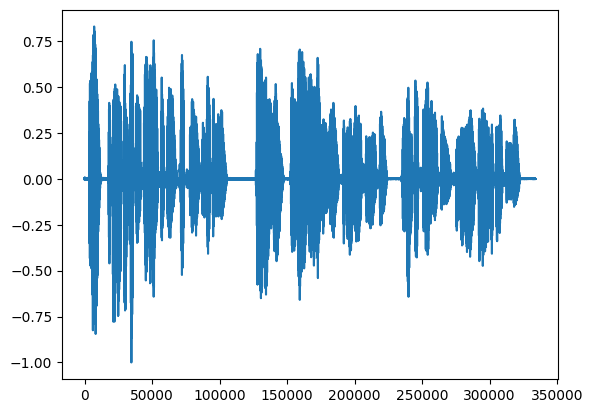

In [4]:
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
# 푸리에 변환
wav, _ = sf.read(data['wav'])
#wav = np.concatenate((wav, wav))
print(len(wav))
plt.plot(wav)
plt.show()

# Load Model

In [5]:
import torch
from merdataset import *
from config import *
from utils import *

model = torch.load('./ckpt/{}.pt'.format(model_name))
softmax = torch.nn.Softmax(dim=0)

model.eval()


/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Kwav2vec_classfier(
  (classifier): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=768, out_features=512, bias=True)
    (2): GELU(approximate='none')
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=512, out_features=2, bias=True)
  )
  (projection): Conv1d(1024, 768, kernel_size=(1,), stride=(1,), bias=False)
  (avgpool): AdaptiveAvgPool1d(output_size=1)
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

## processor output

In [6]:
import time

start = time.time()
#processor_output = model.audio_encoder.processor(wav, sampling_rate=16000, return_attention_mask=True, return_tensors='pt')
#processor_output = processor_output.to(cuda)
#processor_output.input_values.shape
from transformers.models.wav2vec2 import Wav2Vec2FeatureExtractor
processor = Wav2Vec2FeatureExtractor(sampling_rate=8000)
processor_output = processor(wav, sampling_rate=8000, return_attention_mask=True, return_tensors='pt')
processor_output = processor_output.to(cuda)
print(processor_output.input_values.shape)
print(processor_output.attention_mask.shape)
print("processor done :", time.time() - start, '초')


2023-12-11 05:37:24.716235: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 05:37:24.716313: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 05:37:24.716335: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-11 05:37:24.721350: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


torch.Size([1, 334080])
torch.Size([1, 334080])
processor done : 2.211089611053467 초


In [7]:
processor_output.input_values[0]

tensor([ 0.0264,  0.0205,  0.0181,  ..., -0.0010, -0.0015, -0.0022],
       device='cuda:0')

In [8]:
model.audio_encoder.encoder

Wav2Vec2Model(
  (feature_extractor): Wav2Vec2FeatureEncoder(
    (conv_layers): ModuleList(
      (0): Wav2Vec2LayerNormConvLayer(
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
        (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (activation): GELUActivation()
      )
      (1-4): 4 x Wav2Vec2LayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
        (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (activation): GELUActivation()
      )
      (5-6): 2 x Wav2Vec2LayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,))
        (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (activation): GELUActivation()
      )
    )
  )
  (feature_projection): Wav2Vec2FeatureProjection(
    (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (projection): Linear(in_features=512, out_features=1024, bias=True)
    (dropout)

## feature_extractor output

In [9]:
model.audio_encoder.encoder.feature_extractor

Wav2Vec2FeatureEncoder(
  (conv_layers): ModuleList(
    (0): Wav2Vec2LayerNormConvLayer(
      (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (activation): GELUActivation()
    )
    (1-4): 4 x Wav2Vec2LayerNormConvLayer(
      (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (activation): GELUActivation()
    )
    (5-6): 2 x Wav2Vec2LayerNormConvLayer(
      (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,))
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (activation): GELUActivation()
    )
  )
)

In [10]:

feature_extractor_output = model.audio_encoder.encoder.feature_extractor(processor_output.input_values)
print(feature_extractor_output.shape)
feature_extractor_output = feature_extractor_output.transpose(1, 2)
print(feature_extractor_output.shape)
print("feature_extractor done :", time.time() - start, '초')

torch.Size([1, 512, 1043])
torch.Size([1, 1043, 512])
feature_extractor done : 5.045419454574585 초


## feature_projection output

In [11]:

hidden_states, extract_features = model.audio_encoder.encoder.feature_projection(feature_extractor_output)
print(hidden_states.shape)
#hidden_states = model.audio_encoder.encoder._mask_hidden_states(hidden_states)
#print('hidden_states:', hidden_states.shape)
#print('extract_features:', extract_features.shape)
print("feature_projection done :", time.time() - start, '초')

torch.Size([1, 1043, 1024])
feature_projection done : 5.061758279800415 초


## encoder output

In [12]:
encoder_outputs = model.audio_encoder.encoder.encoder(
            hidden_states,
            output_hidden_states=False,
            output_attentions=True
        )
hidden_states = encoder_outputs[0]
print(hidden_states.shape)
#print(hidden_states.shape)
#Total_output = (hidden_states, extract_features) + encoder_outputs[1:]
#Total_output
print("encoder done :", time.time() - start, '초')

torch.Size([1, 1043, 1024])
encoder done : 5.30392599105835 초


In [13]:
model.audio_encoder.encoder.encoder

Wav2Vec2EncoderStableLayerNorm(
  (pos_conv_embed): Wav2Vec2PositionalConvEmbedding(
    (conv): Conv1d(1024, 1024, kernel_size=(128,), stride=(1,), padding=(64,), groups=16)
    (padding): Wav2Vec2SamePadLayer()
    (activation): GELUActivation()
  )
  (layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (layers): ModuleList(
    (0-23): 24 x Wav2Vec2EncoderLayerStableLayerNorm(
      (attention): Wav2Vec2Attention(
        (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
        (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
        (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
        (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
      )
      (dropout): Dropout(p=0.1, inplace=False)
      (layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (feed_forward): Wav2Vec2FeedForward(
        (intermediate_dropout): Dropout(p=0.0, inpl

In [14]:
for att in encoder_outputs.attentions:
    print(att.shape)
    

torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])
torch.Size([1, 16, 1043, 1043])


In [15]:
'''
for layer in model.audio_encoder.encoder.encoder.layers:
    print(layer.attention)
    break

print(layer.attention.k_proj)
print(layer.attention.v_proj)
print(layer.attention.q_proj)
'''

'\nfor layer in model.audio_encoder.encoder.encoder.layers:\n    print(layer.attention)\n    break\n\nprint(layer.attention.k_proj)\nprint(layer.attention.v_proj)\nprint(layer.attention.q_proj)\n'

## size 

In [16]:
hidden_states.shape

torch.Size([1, 1043, 1024])

In [17]:
hidden_batch = torch.Tensor().to(cuda)
hidden = hidden_states
seq = hidden.size()[1]
if seq > max_length:
    # truncation
    hidden = hidden[:,:max_length,:].to(cuda)
elif seq < max_length:
    # padding
    pad = torch.Tensor([[[0]*1024]*(max_length-seq)]).to(cuda)
    hidden = torch.cat([hidden,pad], dim=1)
hidden_batch = torch.cat([hidden_batch,hidden],dim=0)
#print(hidden_batch.shape)
#hidden_batch
print("max_length done :", time.time() - start, '초')


max_length done : 5.980839014053345 초


## before classifier 

In [18]:
hidden_batch.shape

torch.Size([1, 512, 1024])

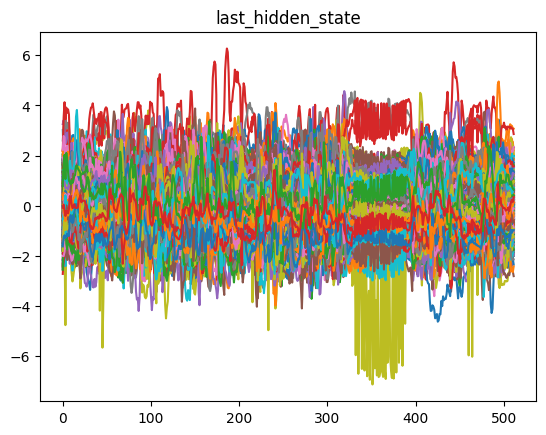

In [19]:
import matplotlib.pyplot as plt

plt.title('last_hidden_state')
plt.plot(hidden_batch.tolist()[0])
plt.show()

# Inference

In [20]:
def DevoX_Inference(model, audio_out):
    audio_out = model._conv1d(audio_out)
    audio_out = audio_out.transpose(1, 2)
        
    audio_out = model.avgpool(audio_out)
    audio_out = torch.squeeze(audio_out)

    return model.classifier(audio_out)

import time

start = time.time()
print('딥보이스 일까요?')
print('정답:', data['label'])

outputs = DevoX_Inference(model, hidden_batch)
soft_outputs = softmax(outputs)
print('DevoX:',labels[torch.argmax(soft_outputs)])

end = time.time()
print('추론시간:', round(end-start, 3),'초')
print()


딥보이스 일까요?
정답: fake
DevoX: fake
추론시간: 0.045 초



In [21]:
hidden_batch

tensor([[[ 0.6096,  0.6791,  0.1205,  ...,  0.0368,  0.7889, -0.0864],
         [ 0.7796,  0.6330,  0.2492,  ..., -0.1402,  1.7669,  0.0411],
         [ 0.5014,  0.3918,  0.3783,  ..., -0.4554,  2.0260, -0.1853],
         ...,
         [ 0.1892,  0.9639, -0.2435,  ...,  0.0391,  0.7751,  0.2271],
         [ 0.1579,  1.0762, -0.2558,  ..., -0.0119,  0.6859,  0.1472],
         [ 0.1162,  1.1724, -0.0744,  ...,  0.1418,  0.6364,  0.3444]]],
       device='cuda:0', grad_fn=<CatBackward0>)

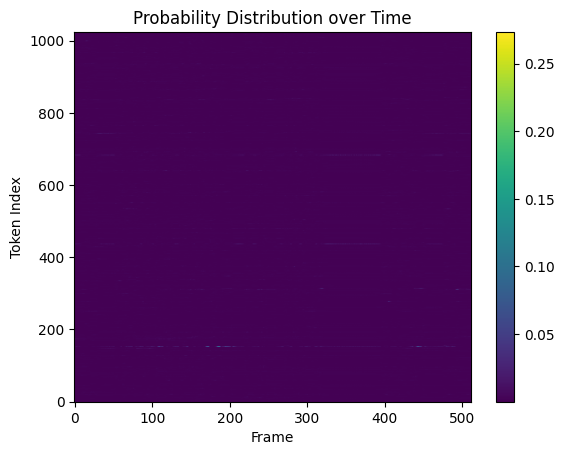

In [24]:
# 확률값으로 변환
probs = torch.nn.functional.softmax(hidden_batch, dim=-1)

# Tensor를 CPU로 이동시키고 NumPy로 변환
probs_cpu = probs[0].detach().cpu().numpy()

plt.imshow(probs_cpu.T, aspect="auto", origin="lower", cmap="viridis")
plt.title("Probability Distribution over Time")
plt.xlabel("Frame")
plt.ylabel("Token Index")
plt.colorbar()
plt.show()